In [9]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
import numpy as np
from tqdm import tqdm
from itertools import product
import hdbscan
from sklearn.metrics import silhouette_score
import plotly.express as px

# Load datasets
datasets = {
    'Dataset_1': pd.read_csv("/Users/leo/Programming/PLR/Leo/data/dataset_1.csv").drop(columns=['Unnamed: 0']),
    'Dataset_2': pd.read_csv("/Users/leo/Programming/PLR/Leo/data/dataset_2.csv").drop(columns=['Unnamed: 0']),
    'Dataset_3': pd.read_csv("/Users/leo/Programming/PLR/Leo/data/dataset_3.csv").drop(columns=['Unnamed: 0']),
    'Dataset_4': pd.read_csv("/Users/leo/Programming/PLR/Leo/data/dataset_4.csv").drop(columns=['Unnamed: 0'])
}

# Artificial labels for each dataset
labels = {name: np.random.randint(0, 2, size=len(data)) for name, data in datasets.items()}

# Define the range of parameters for the grid search
n_estimators_range = [10, 25, 50]
perplexities = [2, 5,10]
learning_rates = [5, 10]
n_iterations = [2000, 2500, 3000]
top_features_range = [5,7,10]

# Calculate total combinations including datasets and top features range
total_combinations = len(datasets) * len(n_estimators_range) * len(perplexities) * len(learning_rates) * len(n_iterations) * len(top_features_range)

# Create the output directory if it doesn't exist
output_dir = os.path.join(os.getcwd(), 'output')
os.makedirs(output_dir, exist_ok=True)

# Store the results
results = []

# Single tqdm progress bar for all combinations
with tqdm(total=total_combinations, desc='Grid Search Progress') as pbar:
    for dataset_name, dataset in datasets.items():
        for n_estimators, perplexity, learning_rate, n_iter, N in product(n_estimators_range, perplexities, learning_rates, n_iterations, top_features_range):
            # Train Random Forest with current number of estimators
            forest = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
            forest.fit(dataset, labels[dataset_name])
            importances = forest.feature_importances_
            indices = np.argsort(importances)[-N:]
            top_features = dataset.columns[indices]

            # Apply t-SNE with current parameters
            tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter, random_state=42)
            tsne_results = tsne.fit_transform(dataset[top_features])

            # Apply HDBSCAN clustering
            clusterer = hdbscan.HDBSCAN()
            cluster_labels = clusterer.fit_predict(tsne_results)

            # Compute silhouette score
            if len(set(cluster_labels)) > 1:
                sil_score = silhouette_score(tsne_results, cluster_labels)
            else:
                sil_score = None

            # Store the results including top feature names and silhouette score
            results.append({
                'dataset': dataset_name,
                'n_estimators': n_estimators,
                'perplexity': perplexity,
                'learning_rate': learning_rate,
                'n_iter': n_iter,
                'N_top_features': N,
                'tsne_results': tsne_results,
                'top_features': top_features.tolist(),
                'silhouette_score': sil_score,
                'cluster_labels': cluster_labels
            })

            unique_labels = np.unique(cluster_labels)
            colors = {str(label): 'white' if label == -1 else None for label in unique_labels}

            # Plot the results for the current iteration with cluster colors using Plotly
            fig = px.scatter(
                x=tsne_results[:, 0], y=tsne_results[:, 1], color=cluster_labels.astype(str),
                color_discrete_map=colors,
                labels={'color': 'Cluster'},
                title=f"{dataset_name} - t-SNE with RF ({n_estimators} Estimators, Top {N} Features) - Clusters"
            )
            fig.update_traces(marker=dict(size=5))

            # Save the figure to the output directory
            fig_file_name = os.path.join(output_dir, f"{dataset_name}_tsne_rf_{n_estimators}_perp_{perplexity}_lr_{learning_rate}_iter_{n_iter}_top{N}.png")
            fig.write_image(fig_file_name)

            # Update the tqdm progress bar
            pbar.update(1)


Grid Search Progress:   0%|          | 2/648 [00:26<2:26:16, 13.59s/it]

In [2]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
import numpy as np
from tqdm import tqdm
from itertools import product
import hdbscan
from sklearn.metrics import silhouette_score
import plotly.express as px

# Load datasets
datasets = {
    #'Dataset_1': pd.read_csv("/Users/leo/Programming/PLR/Leo/data/dataset_1.csv").drop(columns=['Unnamed: 0']),
    #'Dataset_2': pd.read_csv("/Users/leo/Programming/PLR/Leo/data/dataset_2.csv").drop(columns=['Unnamed: 0']),
    #'Dataset_3': pd.read_csv("/Users/leo/Programming/PLR/Leo/data/dataset_3.csv").drop(columns=['Unnamed: 0']),
    'Dataset_4': pd.read_csv("/Users/leo/Programming/PLR/Leo/data/dataset_4.csv").drop(columns=['Unnamed: 0'])
}

# Artificial labels for each dataset
labels = {name: np.random.randint(0, 2, size=len(data)) for name, data in datasets.items()}

# Define the range of parameters for the grid search
n_estimators_range = [25, 50]
perplexities = [5]
learning_rates = [5, 10]
n_iterations = [2500, 3000]
top_features_range = [10, 15, 25, 50]
min_cluster_sizes = [15, 20, 25, 30]  # Adjust these values based on your data
min_samples = [10, 15, 20]        # Adjust these values based on your data

# Calculate total combinations including datasets and top features range
total_combinations = len(datasets) * len(n_estimators_range) * len(perplexities) * len(learning_rates) * len(n_iterations) * len(top_features_range) * len(min_cluster_sizes) * len(min_samples)

# Create the output directory if it doesn't exist
output_dir = os.path.join(os.getcwd(), 'output')
os.makedirs(output_dir, exist_ok=True)

# Store the results
results = []

# Single tqdm progress bar for all combinations
with tqdm(total=total_combinations, desc='Grid Search Progress') as pbar:
    for dataset_name, dataset in datasets.items():
        for n_estimators, perplexity, learning_rate, n_iter, N, min_cluster_size, min_sample in product(n_estimators_range, perplexities, learning_rates, n_iterations, top_features_range, min_cluster_sizes, min_samples):
            # Train Random Forest with current number of estimators
            forest = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
            forest.fit(dataset, labels[dataset_name])
            importances = forest.feature_importances_
            indices = np.argsort(importances)[-N:]
            top_features = dataset.columns[indices]

            # Apply t-SNE with current parameters
            tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter, random_state=42)
            tsne_results = tsne.fit_transform(dataset[top_features])

            # Apply HDBSCAN clustering with adjusted parameters
            clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_sample)
            cluster_labels = clusterer.fit_predict(tsne_results)

            # Compute silhouette score
            num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
            if num_clusters > 1:
                sil_score = silhouette_score(tsne_results, cluster_labels)
            else:
                sil_score = None

            # Store the results including top feature names and silhouette score
            results.append({
                'dataset': dataset_name,
                'n_estimators': n_estimators,
                'perplexity': perplexity,
                'learning_rate': learning_rate,
                'n_iter': n_iter,
                'N_top_features': N,
                'min_cluster_size': min_cluster_size,
                'min_samples': min_sample,
                'tsne_results': tsne_results,
                'top_features': top_features.tolist(),
                'silhouette_score': sil_score,
                'cluster_labels': cluster_labels,
                'num_clusters': num_clusters
            })

            unique_labels = np.unique(cluster_labels)
            colors = {str(label): 'white' if label == -1 else None for label in unique_labels}

            # Plot the results for the current iteration with cluster colors using Plotly
            fig = px.scatter(
                x=tsne_results[:, 0], y=tsne_results[:, 1], color=cluster_labels.astype(str),
                color_discrete_map=colors,
                labels={'color': 'Cluster'},
                title=f"{dataset_name} - t-SNE with RF ({n_estimators} Estimators, Top {N} Features) - Clusters"
            )
            fig.update_traces(marker=dict(size=5))

            # Save the figure to the output directory
            fig_file_name = os.path.join(output_dir, f"{dataset_name}_tsne_rf_{n_estimators}_perp_{perplexity}_lr_{learning_rate}_iter_{n_iter}_top{N}_mcs{min_cluster_size}_ms{min_sample}.png")
            fig.write_image(fig_file_name)

            # Update the tqdm progress bar
            pbar.update(1)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Optionally, save the results DataFrame to a file
# results_df.to_csv(os.path.join(output_dir, 'grid_search_results.csv'), index=False)


Grid Search Progress:   0%|          | 0/384 [00:00<?, ?it/s]

Grid Search Progress:  36%|███▌      | 138/384 [47:54<1:28:13, 21.52s/it]

In [1]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
import numpy as np
from tqdm import tqdm
from itertools import product
import hdbscan
from sklearn.metrics import silhouette_score
import plotly.express as px

# Load datasets
datasets = {
    'Dataset_4': pd.read_csv("/Users/leo/Programming/PLR/Leo/data/dataset_4.csv").drop(columns=['Unnamed: 0'])
}

# Artificial labels for each dataset
labels = {name: np.random.randint(0, 2, size=len(data)) for name, data in datasets.items()}

# Define the range of parameters for the grid search
n_estimators_range = [25, 50]
perplexities = [5]
learning_rates = [5, 10]
n_iterations = [2500, 3000]
top_features_range = [10, 15, 25, 50]
min_cluster_sizes = [15, 20, 25, 30] 
min_samples = [10, 15, 20]

# Calculate total combinations
total_combinations = len(datasets) * len(n_estimators_range) * len(perplexities) * len(learning_rates) * len(n_iterations) * len(top_features_range) * len(min_cluster_sizes) * len(min_samples)

# Create output directory
output_dir = os.path.join(os.getcwd(), 'output')
os.makedirs(output_dir, exist_ok=True)

# Store results
results = []

# Progress bar for all combinations
with tqdm(total=total_combinations, desc='Grid Search Progress') as pbar:
    for dataset_name, dataset in datasets.items():
        for n_estimators, perplexity, learning_rate, n_iter, N, min_cluster_size, min_sample in product(n_estimators_range, perplexities, learning_rates, n_iterations, top_features_range, min_cluster_sizes, min_samples):
            # Train Random Forest
            forest = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
            forest.fit(dataset, labels[dataset_name])
            importances = forest.feature_importances_
            indices = np.argsort(importances)[-N:]
            top_features = dataset.columns[indices]

            # Apply t-SNE
            tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter, random_state=42)
            tsne_results = tsne.fit_transform(dataset[top_features])

            # Apply HDBSCAN clustering
            clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_sample)
            cluster_labels = clusterer.fit_predict(tsne_results)

            # Compute silhouette score
            num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
            sil_score = silhouette_score(tsne_results, cluster_labels) if num_clusters > 1 else None

            # Store results
            results.append({
                'dataset': dataset_name,
                'n_estimators': n_estimators,
                'perplexity': perplexity,
                'learning_rate': learning_rate,
                'n_iter': n_iter,
                'N_top_features': N,
                'min_cluster_size': min_cluster_size,
                'min_samples': min_sample,
                'tsne_results': tsne_results,
                'top_features': top_features.tolist(),
                'silhouette_score': sil_score,
                'cluster_labels': cluster_labels,
                'num_clusters': num_clusters
            })

            # Plot results
            fig = px.scatter(
                x=tsne_results[:, 0], y=tsne_results[:, 1], color=cluster_labels.astype(str),
                color_discrete_map={str(label): 'white' if label == -1 else None for label in np.unique(cluster_labels)},
                labels={'color': 'Cluster'},
                title=f"{dataset_name} - t-SNE with RF ({n_estimators} Estimators, Top {N} Features) - Clusters"
            )
            fig.update_traces(marker=dict(size=5))
            fig_file_name = os.path.join(output_dir, f"{dataset_name}_tsne_rf_{n_estimators}_perp_{perplexity}_lr_{learning_rate}_iter_{n_iter}_top{N}_mcs{min_cluster_size}_ms{min_sample}.png")
            fig.write_image(fig_file_name)
            pbar.update(1)

# Convert results to DataFrame and save
results_df = pd.DataFrame(results)
results_df.to_csv(os.path.join(output_dir, 'grid_search_results.csv'), index=False)


Grid Search Progress: 100%|██████████| 384/384 [17:13:22<00:00, 161.47s/it]    


In [3]:
# Assuming the rest of your code remains unchanged and results_df is your DataFrame containing the results

# Sort the DataFrame by 'silhouette_score' in descending order
# and handle None values (if any) by putting them at the end
results_df_sorted = results_df.sort_values(by='silhouette_score', ascending=False, na_position='last')

# Select the top 10 parameter combinations
top_10_params = results_df_sorted.head(10)

# Save the top 10 parameter combinations to a CSV file
top_10_params.to_csv(os.path.join(output_dir, 'top_10_params.csv'), index=False)

# Optionally, you can print the top 10 parameter combinations for immediate inspection
top_10_params

,dataset,n_estimators,perplexity,learning_rate,n_iter,N_top_features,min_cluster_size,min_samples,tsne_results,top_features,silhouette_score,cluster_labels,num_clusters
358,Dataset_4,50,5,10,3000,15,30,15,"[[14.780139, -10.019026], [-15.4196615, -16.64...","[Symptom_Headaches_temples, Symptom_Sore_throa...",0.081195,"[1, 1, 1, 1, -1, 1, 0, 1, -1, 1, 1, 1, 1, 1, 1...",2
355,Dataset_4,50,5,10,3000,15,25,15,"[[14.780139, -10.019026], [-15.4196615, -16.64...","[Symptom_Headaches_temples, Symptom_Sore_throa...",0.081195,"[1, 1, 1, 1, -1, 1, 0, 1, -1, 1, 1, 1, 1, 1, 1...",2
168,Dataset_4,25,5,10,3000,25,15,10,"[[8.534712, 19.979946], [-47.373257, 14.555777...","[Symptom_Constipation, Symptom_Vivid_dreams, S...",0.073743,"[1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",2
354,Dataset_4,50,5,10,3000,15,25,10,"[[14.780139, -10.019026], [-15.4196615, -16.64...","[Symptom_Headaches_temples, Symptom_Sore_throa...",0.072339,"[1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1...",2
357,Dataset_4,50,5,10,3000,15,30,10,"[[14.780139, -10.019026], [-15.4196615, -16.64...","[Symptom_Headaches_temples, Symptom_Sore_throa...",0.072339,"[1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1...",2
351,Dataset_4,50,5,10,3000,15,20,10,"[[14.780139, -10.019026], [-15.4196615, -16.64...","[Symptom_Headaches_temples, Symptom_Sore_throa...",0.072339,"[1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1...",2
111,Dataset_4,25,5,10,2500,15,20,10,"[[40.71209, -38.143707], [-29.73839, -56.96556...","[Symptom_Muscle_aches, Symptom_SkinAllergy_itc...",0.059422,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2
306,Dataset_4,50,5,10,2500,15,25,10,"[[13.622753, -8.976582], [-14.738723, -14.1205...","[Symptom_Headaches_temples, Symptom_Sore_throa...",0.056340,"[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2
210,Dataset_4,50,5,5,2500,15,25,10,"[[9.101111, -4.2168503], [-19.472254, -18.7290...","[Symptom_Headaches_temples, Symptom_Sore_throa...",0.055636,"[1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1...",2
129,Dataset_4,25,5,10,2500,25,30,10,"[[8.453799, 18.921907], [-44.5267, 14.083506],...","[Symptom_Constipation, Symptom_Vivid_dreams, S...",0.055115,"[1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",2


In [11]:
filtered_rows = results_df[results_df['cluster_labels'].apply(lambda x: 10 <= len(set(x)) <= 20)]
# sort by silhouette score
filtered_rows.sort_values(by='silhouette_score', ascending=False, inplace=True)
# get the top 10
top_10 = filtered_rows.head(10)
top_10


/var/folders/dt/bgs1hq3d2k3dvhpt3llvs4rw0000gn/T/ipykernel_82734/1217197083.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,dataset,n_estimators,perplexity,learning_rate,n_iter,N_top_features,min_cluster_size,min_samples,tsne_results,top_features,silhouette_score,cluster_labels,num_clusters
294,Dataset_4,50,5,10,2500,10,25,10,"[[3.8158476, -104.59997], [-77.48276, -22.1545...","[Symptom_Merged_temperature_other_temp_issues,...",0.000587,"[8, 8, 8, 8, 8, 8, 4, 8, 8, 8, 8, -1, 8, 8, 8,...",9
290,Dataset_4,50,5,10,2500,10,15,20,"[[3.8158476, -104.59997], [-77.48276, -22.1545...","[Symptom_Merged_temperature_other_temp_issues,...",-0.011099,"[6, 6, 6, 6, 6, 6, -1, 6, 6, 6, 6, -1, 6, 6, 6...",9
345,Dataset_4,50,5,10,3000,10,30,10,"[[3.5972836, -120.10175], [-88.72562, -24.8808...","[Symptom_Merged_temperature_other_temp_issues,...",-0.096841,"[9, 10, 10, -1, 10, 10, -1, 10, -1, 10, 10, -1...",11
8,Dataset_4,25,5,5,2500,10,25,20,"[[-0.0825896, -102.84935], [-59.60428, -27.190...","[Symptom_Headaches_temples, Symptom_Pain_burni...",-0.145307,"[-1, 8, 8, -1, -1, 8, -1, 8, 8, 8, -1, 8, 8, 3...",10
54,Dataset_4,25,5,5,3000,10,25,10,"[[0.16377322, -119.66153], [-67.8627, -31.8969...","[Symptom_Headaches_temples, Symptom_Pain_burni...",-0.167580,"[-1, 10, 10, -1, -1, 10, -1, 10, 10, 10, -1, 1...",12
343,Dataset_4,50,5,10,3000,10,25,15,"[[3.5972836, -120.10175], [-88.72562, -24.8808...","[Symptom_Merged_temperature_other_temp_issues,...",-0.174576,"[8, 8, 8, 8, 8, 8, -1, 8, -1, 8, 8, -1, -1, 8,...",9
151,Dataset_4,25,5,10,3000,10,25,15,"[[-1.6503503, -162.35442], [-90.092606, -54.65...","[Symptom_Headaches_temples, Symptom_Pain_burni...",-0.178793,"[-1, 12, 12, -1, -1, 12, -1, 12, 12, 12, -1, 1...",13
344,Dataset_4,50,5,10,3000,10,25,20,"[[3.5972836, -120.10175], [-88.72562, -24.8808...","[Symptom_Merged_temperature_other_temp_issues,...",-0.179079,"[10, -1, 10, 10, 10, 10, -1, 10, 8, 10, 10, -1...",11
103,Dataset_4,25,5,10,2500,10,25,15,"[[-1.3000196, -139.76892], [-78.83089, -47.981...","[Symptom_Headaches_temples, Symptom_Pain_burni...",-0.191401,"[-1, 12, 12, -1, -1, 12, -1, 12, 12, 12, -1, 1...",13
197,Dataset_4,50,5,5,2500,10,20,20,"[[5.859568, -81.91507], [-64.822464, -11.99468...","[Symptom_Merged_temperature_other_temp_issues,...",-0.193856,"[-1, -1, 11, -1, -1, 11, 7, 11, 10, 11, -1, -1...",12


In [2]:
dataset_4 = pd.read_csv("/Users/leo/Programming/PLR/Leo/data/dataset_4.csv").drop(columns=['Unnamed: 0'])
dataset_4 = dataset_4[["Grouped_Neuro_Sensory", "Grouped_Cognitive_Memory", "Grouped_Gastrointestinal", "Grouped_Respiratory_Cardiac", "Grouped_Eye_Vision"]]

In [3]:
dataset_4

,Grouped_Neuro_Sensory,Grouped_Cognitive_Memory,Grouped_Gastrointestinal,Grouped_Respiratory_Cardiac,Grouped_Eye_Vision
0,0,1,0,0,0
1,1,1,0,0,0
2,1,1,1,1,0
3,1,0,1,1,0
4,1,0,0,1,0
...,...,...,...,...,...
4191,0,1,0,1,0
4192,1,1,0,1,1
4193,0,1,0,1,0
4194,0,1,1,1,0


In [6]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
import numpy as np
from tqdm import tqdm
from itertools import product
import hdbscan
from sklearn.metrics import silhouette_score
import plotly.express as px

# Load datasets
datasets = {
    'Dataset_4': dataset_4
}

# Artificial labels for each dataset
labels = {name: np.random.randint(0, 2, size=len(data)) for name, data in datasets.items()}

# Define the range of parameters for the grid search
n_estimators_range = [50]
perplexities = [5]
learning_rates = [10]
n_iterations = [2500, 3000]
top_features_range = [5]
min_cluster_sizes = [15, 20, 25, 30] 
min_samples = [5, 10, 15, 20]

# Calculate total combinations
total_combinations = len(datasets) * len(n_estimators_range) * len(perplexities) * len(learning_rates) * len(n_iterations) * len(top_features_range) * len(min_cluster_sizes) * len(min_samples)

# Create output directory
output_dir = os.path.join(os.getcwd(), 'output')
os.makedirs(output_dir, exist_ok=True)

# Store results
results = []

# Progress bar for all combinations
with tqdm(total=total_combinations, desc='Grid Search Progress') as pbar:
    for dataset_name, dataset in datasets.items():
        for n_estimators, perplexity, learning_rate, n_iter, N, min_cluster_size, min_sample in product(n_estimators_range, perplexities, learning_rates, n_iterations, top_features_range, min_cluster_sizes, min_samples):
            # Train Random Forest
            forest = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
            forest.fit(dataset, labels[dataset_name])
            importances = forest.feature_importances_
            indices = np.argsort(importances)[-N:]
            top_features = dataset.columns[indices]

            # Apply t-SNE
            tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter, random_state=42)
            tsne_results = tsne.fit_transform(dataset[top_features])

            # Apply HDBSCAN clustering
            clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_sample)
            cluster_labels = clusterer.fit_predict(tsne_results)

            # Compute silhouette score
            num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
            sil_score = silhouette_score(tsne_results, cluster_labels) if num_clusters > 1 else None

            # Store results
            results.append({
                'dataset': dataset_name,
                'n_estimators': n_estimators,
                'perplexity': perplexity,
                'learning_rate': learning_rate,
                'n_iter': n_iter,
                'N_top_features': N,
                'min_cluster_size': min_cluster_size,
                'min_samples': min_sample,
                'tsne_results': tsne_results,
                'top_features': top_features.tolist(),
                'silhouette_score': sil_score,
                'cluster_labels': cluster_labels,
                'num_clusters': num_clusters
            })

            # Plot results
            fig = px.scatter(
                x=tsne_results[:, 0], y=tsne_results[:, 1], color=cluster_labels.astype(str),
                color_discrete_map={str(label): 'white' if label == -1 else None for label in np.unique(cluster_labels)},
                labels={'color': 'Cluster'},
                title=f"{dataset_name} - t-SNE with RF ({n_estimators} Estimators, Top {N} Features) - Clusters"
            )
            fig.update_traces(marker=dict(size=5))
            fig_file_name = os.path.join(output_dir, f"{dataset_name}_tsne_rf_{n_estimators}_perp_{perplexity}_lr_{learning_rate}_iter_{n_iter}_top{N}_mcs{min_cluster_size}_ms{min_sample}.png")
            fig.write_image(fig_file_name)
            pbar.update(1)

# Convert results to DataFrame and save
results_df = pd.DataFrame(results)
results_df.to_csv(os.path.join(output_dir, 'grid_search_results.csv'), index=False)


Grid Search Progress:   0%|          | 0/32 [00:00<?, ?it/s]

Grid Search Progress:  91%|█████████ | 29/32 [05:00<00:31, 10.36s/it]


FileNotFoundError: [Errno 2] No such file or directory: '/Users/leo/Programming/PLR/Leo/T_SNE/output/Dataset_4_tsne_rf_50_perp_5_lr_10_iter_3000_top5_mcs30_ms10.png'

/var/folders/dt/bgs1hq3d2k3dvhpt3llvs4rw0000gn/T/ipykernel_89840/2062672016.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('nipy_spectral', len(unique_clusters))(np.arange(len(unique_clusters)))


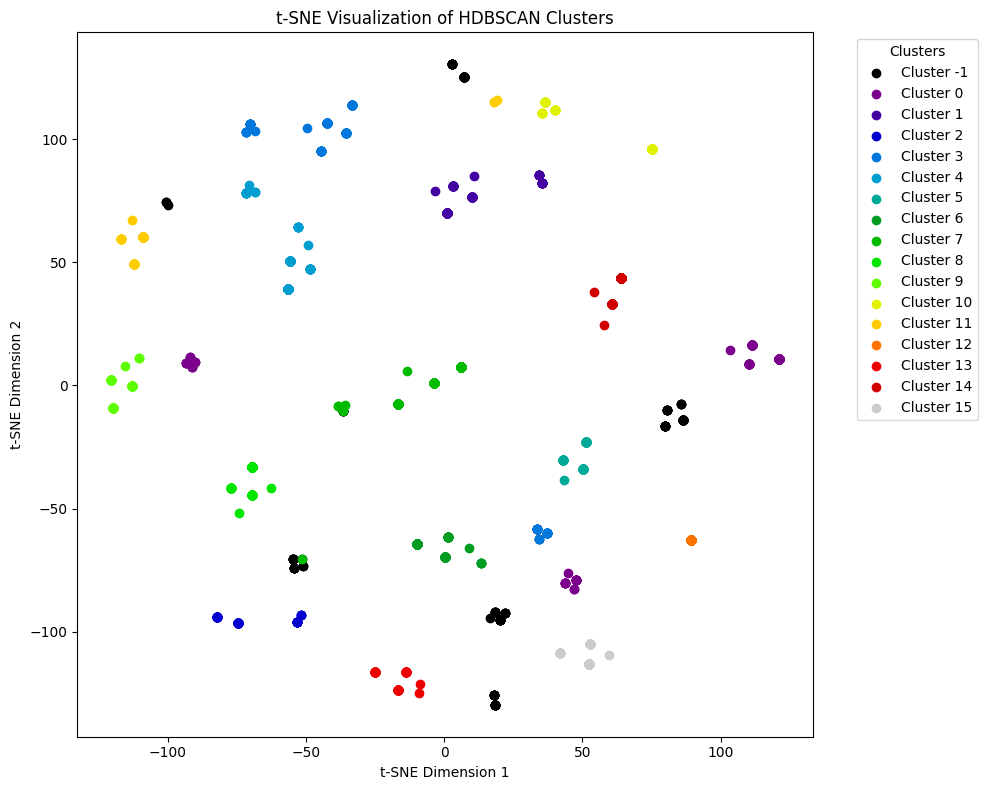

      Grouped_Neuro_Sensory  Grouped_Cognitive_Memory  \
0                         0                         1   
1                         1                         1   
2                         1                         1   
3                         1                         0   
4                         1                         0   
...                     ...                       ...   
4191                      0                         1   
4192                      1                         1   
4193                      0                         1   
4194                      0                         1   
4195                      0                         1   

      Grouped_Gastrointestinal  Grouped_Respiratory_Cardiac  \
0                            0                            0   
1                            0                            0   
2                            1                            1   
3                            1                            1   


In [6]:
import pandas as pd
import hdbscan
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import numpy as np

# Assuming 'dataset_4' is your DataFrame
df = dataset_4

# Apply HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=100)
clusters = clusterer.fit_predict(df)

# Append cluster labels to the dataset
df['Cluster'] = clusters

# Dimensionality reduction for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df.drop('Cluster', axis=1))

# Visualization using scatter plot
plt.figure(figsize=(10, 8))

# Create a colormap with a sufficiently large number of colors
unique_clusters = np.unique(clusters)
colors = plt.cm.get_cmap('nipy_spectral', len(unique_clusters))(np.arange(len(unique_clusters)))
cluster_colors = {cluster: color for cluster, color in zip(unique_clusters, colors)}

# Plot each cluster with its own color
for cluster, color in cluster_colors.items():
    idx = clusters == cluster
    plt.scatter(tsne_results[idx, 0], tsne_results[idx, 1], color=color, label=f'Cluster {cluster}')

plt.title('t-SNE Visualization of HDBSCAN Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Create a legend
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for the legend
plt.tight_layout()

plt.show()

# Print the updated dataframe
print(df)

# Print silhouette score
sil_score = silhouette_score(tsne_results, clusters)
print(f"Silhouette Score: {sil_score}")

In [17]:
dataset_4

,Grouped_Neuro_Sensory,Grouped_Cognitive_Memory,Grouped_Gastrointestinal,Grouped_Respiratory_Cardiac,Grouped_Eye_Vision,Cluster
0,0,1,0,0,0,12
1,1,1,0,0,0,21
2,1,1,1,1,0,27
3,1,0,1,1,0,1
4,1,0,0,1,0,28
...,...,...,...,...,...,...
4191,0,1,0,1,0,13
4192,1,1,0,1,1,4
4193,0,1,0,1,0,13
4194,0,1,1,1,0,14


In [16]:
# Create a new DataFrame with index and Cluster
output_df = dataset_4.reset_index().rename(columns={'index': 'index', 'Cluster': 'cluster'})

# Save the DataFrame to a CSV file
output_df.to_csv('clusters.csv', columns=['index', 'cluster'], index=False)